Import modules

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
indexfile = "/home/ctroupin/DataOceano/CMEMS/IndexFiles/NorthWestShelves/index_latest.txt"

Read the index file

In [99]:
def read_index_file_box(indexfile):
    dataindex = np.genfromtxt(indexfile, skip_header=6, unpack=True, delimiter=',', dtype=None, \
              names=['catalog_id', 'file_name', 'geospatial_lat_min', 'geospatial_lat_max',
                     'geospatial_lon_min', 'geospatial_lon_max',
                     'time_coverage_start', 'time_coverage_end', 
                     'provider', 'date_update', 'data_mode', 'parameters'])
    lon_min = dataindex['geospatial_lon_min']
    lon_max = dataindex['geospatial_lon_max']
    lat_min = dataindex['geospatial_lat_min']
    lat_max = dataindex['geospatial_lat_max']
    return lon_min, lon_max, lat_min, lat_max

In [100]:
lon_min, lon_max, lat_min, lat_max = read_index_file_box(indexfile)

In [101]:
print lon_max.max()

31.104015


Generate grid based on resolution

In [102]:
resolution = 0.5
lon_grid = np.array([np.arange(-180., 180., resolution)],)
lat_grid = np.array([np.arange(-90., 90., resolution)],)

Rectangle is a matrix containg 1's where inside the domain defined by the data coverage (lon/lat min/max). It is computed by a product of 2 vectors. 

In [103]:
def create_rectangle(lon_min, lon_max, lat_min, lat_max, lon_grid, lat_grid, resolution):
    lon_vec = np.zeros_like(lon_grid)
    lat_vec = np.zeros_like(lat_grid)
    lon_vec[(lon_grid >= lon_min - resolution) & (lon_grid <= lon_max + resolution)] = 1
    lat_vec[(lat_grid >= lat_min - resolution) & (lat_grid <= lat_max + resolution)] = 1
    rectangle = lat_vec.T*lon_vec
    return rectangle

In [104]:
rectangle_sum = np.zeros_like(lat_grid.T*lon_grid)
for lon_min0, lon_max0, lat_min0, lat_max0 in zip(lon_min, lon_max, lat_min, lat_max):
    rectangle = create_rectangle(lon_min0, lon_max0, lat_min0, lat_max0, lon_grid, lat_grid, resolution)
    rectangle_sum += rectangle

(50, 70)

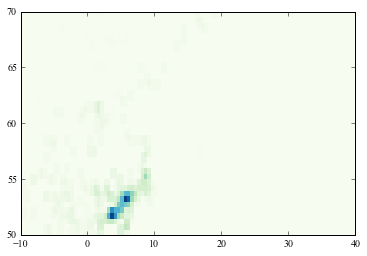

In [106]:
plt.pcolormesh(lon_grid[0], lat_grid[0], rectangle_sum, cmap='GnBu')
plt.xlim(-10, 40)
plt.ylim(50, 70)